In [2]:
import os
import numpy as np
import pandas as pd
import pickle
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.applications import ResNet50
from tensorflow.python.keras.layers import Dense, Flatten,Input, Convolution2D, Dropout, LSTM,  Embedding,  Activation, RepeatVector,Concatenate
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image, sequence

In [3]:
IMAGE_PATH='C:/Users/Admin/Desktop/flickr8k/images/' 
df = pd.read_csv('C:/Users/Admin/Desktop/flickr8k/captions.txt')
df.head()

,image,caption
0,1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set o...
1,1000268201_693b08cb0e.jpg,A girl going into a wooden building .
2,1000268201_693b08cb0e.jpg,A little girl climbing into a wooden playhouse .
3,1000268201_693b08cb0e.jpg,A little girl climbing the stairs to her playh...
4,1000268201_693b08cb0e.jpg,A little girl in a pink dress going into a woo...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40455 entries, 0 to 40454
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   image    40455 non-null  object
 1   caption  40455 non-null  object
dtypes: object(2)
memory usage: 632.2+ KB


In [5]:
df.isnull()

,image,caption
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
40450,False,False
40451,False,False
40452,False,False
40453,False,False


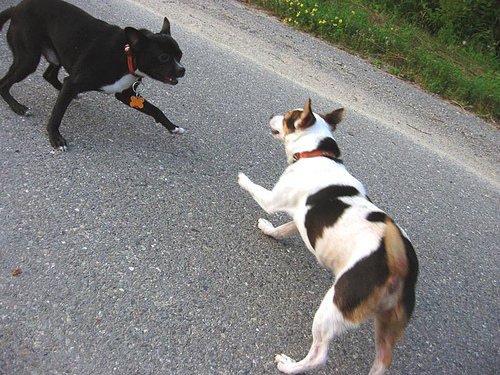

'A black dog and a spotted dog are fighting'

In [6]:
from IPython.display import Image, display
z = Image(filename=IMAGE_PATH+df['image'][5])
display(z)
df['caption'][5]

In [7]:
model = ResNet50(
    include_top=False,
    input_shape=(224,224,3),
    pooling='avg',
    weights='imagenet'
)
for layer in model.layers:
  layer.trainable=False
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [8]:
data = df['image']
labels = df['caption']

In [9]:
print(data.shape, labels.shape)

(40455,) (40455,)


In [13]:
images = []
captions = []
for item in data:
    try:
        image = PIL.Image.open(IMAGE_PATH+item)
        image = image.resize((224,224))
        image = np.array(image)
        images.append(image)
        captions.append(labels[0])
    except Exception as e:
        print(e)

In [19]:
images = np.array(images)

In [ ]:
images.shape()

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\envs\tf_gpu\lib\site-packages\IPython\core\interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-20-810d80864b72>", line 1, in <module>
    images.shape()
TypeError: 'tuple' object is not callable

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\envs\tf_gpu\lib\site-packages\IPython\core\interactiveshell.py", line 2044, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'TypeError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\envs\tf_gpu\lib\site-packages\IPython\core\ultratb.py", line 1169, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "C:\Users\Admin\anacon

In [12]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]